In [70]:
import dataclasses

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [33]:
@dataclasses.dataclass
class Data:
    train: pd.DataFrame
    test: pd.DataFrame

In [34]:
FILES = ('discounts_nonrandom.csv', 'discounts_random.csv')

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [35]:
data = Data(
    train=pd.read_csv(FILES[0], sep=';'),
    test=pd.read_csv(FILES[1])
)

In [36]:
data.train.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [37]:
data.test.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,age,gender,cust_state,tenure,profit
0,0,0,0,0,0,0.0,25,50.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1503.22,20.0,35,1.0,MA,23,55.16
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,5.0,5.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1798.30,60.0,29,1.0,MG,18,29.92
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1122.97,0.0,30,1.0,RJ,20,56.15
3,10,15,0,25,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,15,25,95.0,10.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1217.08,10.0,32,0.0,BA,20,50.85
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,966.58,0.0,30,0.0,PB,22,48.33


In [38]:
set(data.train.columns).difference(set(data.test.columns))

{'sales_prediction', 'sales_prediction_bins'}

In [39]:
data.train.shape

(15000, 45)

In [40]:
data.test.shape

(5000, 43)

In [41]:
data.train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   spend_1m_baby          15000 non-null  int64  
 1   spend_2m_baby          15000 non-null  int64  
 2   spend_3m_baby          15000 non-null  int64  
 3   spend_4m_baby          15000 non-null  int64  
 4   spend_5m_baby          15000 non-null  int64  
 5   spend_6m_baby          15000 non-null  float64
 6   spend_1m_clothes       15000 non-null  int64  
 7   spend_2m_clothes       15000 non-null  float64
 8   spend_3m_clothes       15000 non-null  float64
 9   spend_4m_clothes       15000 non-null  float64
 10  spend_5m_clothes       15000 non-null  float64
 11  spend_6m_clothes       15000 non-null  float64
 12  spend_1m_health        15000 non-null  int64  
 13  spend_2m_health        15000 non-null  int64  
 14  spend_3m_health        15000 non-null  int64  
 15  sp

In [42]:
data.test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spend_1m_baby       5000 non-null   int64  
 1   spend_2m_baby       5000 non-null   int64  
 2   spend_3m_baby       5000 non-null   int64  
 3   spend_4m_baby       5000 non-null   int64  
 4   spend_5m_baby       5000 non-null   int64  
 5   spend_6m_baby       5000 non-null   float64
 6   spend_1m_clothes    5000 non-null   int64  
 7   spend_2m_clothes    5000 non-null   float64
 8   spend_3m_clothes    5000 non-null   float64
 9   spend_4m_clothes    5000 non-null   float64
 10  spend_5m_clothes    5000 non-null   float64
 11  spend_6m_clothes    5000 non-null   float64
 12  spend_1m_health     5000 non-null   int64  
 13  spend_2m_health     5000 non-null   int64  
 14  spend_3m_health     5000 non-null   int64  
 15  spend_4m_health     5000 non-null   int64  
 16  spend_

In [43]:
data.train['discount'] = data.train['discount'].str.split(expand=True).iloc[:, 1].astype(float)

In [50]:
for field in dataclasses.fields(data):
    getattr(data, field.name).to_parquet(f'discounts_{field.name}.parq.gzip')

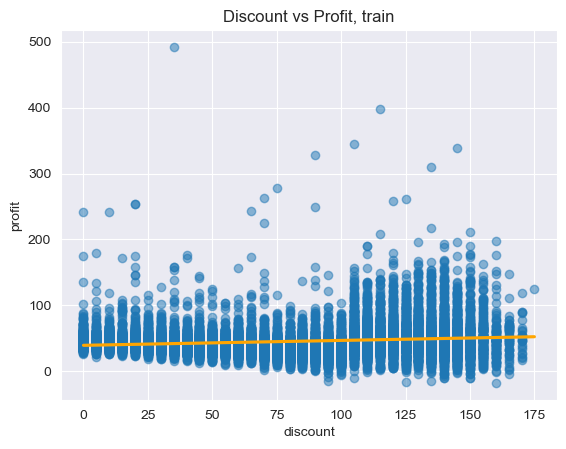

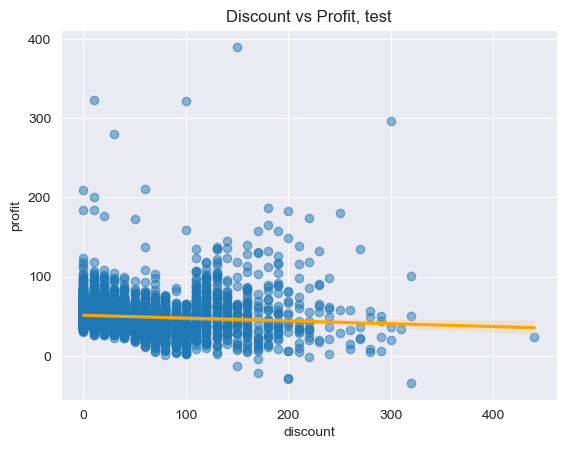

In [58]:
for field in dataclasses.fields(data):
    sns.regplot(
        x='discount', y='profit', data=getattr(data, field.name),
        scatter_kws={"alpha":0.5}, line_kws={'color': 'orange'}
    )
    plt.title(f'Discount vs Profit, {field.name}')
    plt.show()

In [64]:
def elast(data, x, y):
    cov = data[[x, y]].cov()
    return cov.iloc[1, 0] / cov.iloc[0, 0]

In [69]:
for field in dataclasses.fields(data):
    for var in ['sales', 'profit']:
        res = elast(getattr(data, field.name), 'discount', var)
        print(f'Effect of discount on {var}, {field.name.title()} set: {res.round(4)}')

Effect of discount on sales, Train set: 21.9248
Effect of discount on profit, Train set: 0.0743
Effect of discount on sales, Test set: 19.2868
Effect of discount on profit, Test set: -0.0357


In [71]:
train_fit = smf.ols('profit ~ discount', data=data.train).fit()
train_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     303.4
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.71e-67
Time:                        21:01:30   Log-Likelihood:                -68395.
No. Observations:               15000   AIC:                         1.368e+05
Df Residuals:                   14998   BIC:                         1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.4217      0.382    103.274      0.000      38.673      40.170
discount       0.0743      0.004     17.419      0.000       0.066       0.083
==============================================================================
Omnibus:                    11175.278   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516086.235
Skew:                           3.118   Prob(JB):                         0.00
Kurtosis:                      31.051   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
test_fit = smf.ols('profit ~ discount', data=data.test).fit()
test_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     36.70
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.48e-09
Time:                        21:02:07   Log-Likelihood:                -22137.
No. Observations:                5000   AIC:                         4.428e+04
Df Residuals:                    4998   BIC:                         4.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.3226      0.390    131.725      0.000      50.559      52.086
discount      -0.0357      0.006     -6.058      0.000      -0.047      -0.024
==============================================================================
Omnibus:                     4625.439   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427064.114
Skew:                           4.107   Prob(JB):                         0.00
Kurtosis:                      47.525   Cond. No.                         90.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""